In [8]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

path = './datasets/X_opening.csv'
to_drop = [ 'worldwide_gross' , 'opening_gross', 'screens']
x = pd.read_csv(path).drop(to_drop , axis = 1)

In [9]:
x.head(1)

,production_budget,title_year,aspect_ratio,duration.1,budget,imdb_score
0,425000000.0,2009.0,1.78,178.0,237000000.0,7.9


In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   production_budget  2221 non-null   float64
 1   title_year         2221 non-null   float64
 2   aspect_ratio       2221 non-null   float64
 3   duration.1         2221 non-null   float64
 4   budget             2221 non-null   float64
 5   imdb_score         2221 non-null   float64
dtypes: float64(6)
memory usage: 104.2 KB


In [3]:
import seaborn as sns
%matplotlib inline

#### Correlation Matrix

To visualized correlation between features and target. 

In [4]:
#Cuantitavie measurement of correlation between variables

x.corr()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
production_budget,1.000000,0.207884,0.077459,0.276407,0.236820,0.185357,0.033154
title_year,0.207884,1.000000,0.130532,-0.137662,0.124693,0.048664,-0.178685
aspect_ratio,0.077459,0.130532,1.000000,-0.012645,0.020656,0.011340,0.037765
duration.1,0.276407,-0.137662,-0.012645,1.000000,0.121918,0.064252,0.315642
cast_total_facebook_likes,0.236820,0.124693,0.020656,0.121918,1.000000,0.032591,0.096663
budget,0.185357,0.048664,0.011340,0.064252,0.032591,1.000000,0.019417
imdb_score,0.033154,-0.178685,0.037765,0.315642,0.096663,0.019417,1.000000


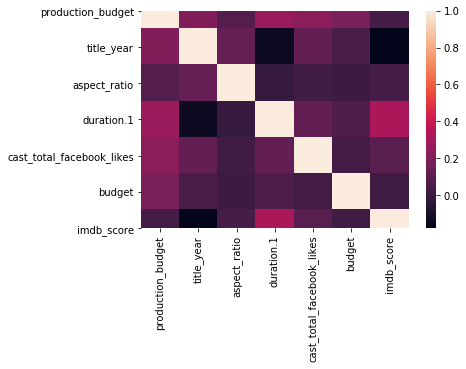

In [5]:
#Visualising Data

sns.heatmap(x.corr())

### Analizing Features

In [6]:
to_drop = ['worldwide_gross' , 'gross']

X = pd.read_csv(path).drop(to_drop , axis = 1)
y = pd.read_csv(path)['worldwide_gross']

In [7]:
from sklearn.linear_model import Lasso

model = Lasso(max_iter=100000)

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y) #leaving training split porcentage as Default

In [9]:
x_train.head(10)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
2214,17000000.0,2004.0,1.85,126.0,2170.0,1.200000e+07,7.5
2020,20000000.0,2003.0,1.85,124.0,7567.0,2.000000e+07,7.7
685,60000000.0,2009.0,2.35,134.0,24458.0,6.000000e+07,7.4
1746,25000000.0,2010.0,2.35,97.0,12841.0,2.500000e+07,6.4
1542,30000000.0,2010.0,2.35,134.0,1873.0,4.045539e+07,7.3
1298,35000000.0,2006.0,2.35,101.0,966.0,3.000000e+07,6.8
178,130000000.0,2010.0,2.35,101.0,12406.0,1.100000e+08,6.4
1072,40000000.0,2009.0,2.35,129.0,318.0,4.000000e+07,6.4
3200,5500000.0,2001.0,2.35,99.0,6776.0,5.500000e+06,4.9
2708,10500000.0,1968.0,2.20,161.0,727.0,1.200000e+07,8.3


In [10]:
x_train.shape

(3078, 7)

In [11]:
#Splitting Porcentage

len(x_train) / len(x)

0.75

In [12]:
#training model

model.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
model.score(x_test, y_test)

0.5970975281699615

##### Parameter of the Lasso Regression

$$model = coef_1 * feature_1 + coef_2 * feature_2 + ...+ coef_N * feature_N $$

In [14]:
model.coef_

array([ 3.13529019e+00, -1.52655962e+05, -4.78025625e+06, -3.08085670e+04,
        1.17708568e+02, -4.70552840e-02,  2.67755032e+07])

In [15]:
#Scaling the coeficients

coef = np.log10(np.abs(model.coef_))

#Integer-part from below

coef = np.floor(coef)
coef

array([ 0.,  5.,  6.,  4.,  2., -2.,  7.])

In [16]:
list(X.columns)

['production_budget',
 'title_year',
 'aspect_ratio',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score']

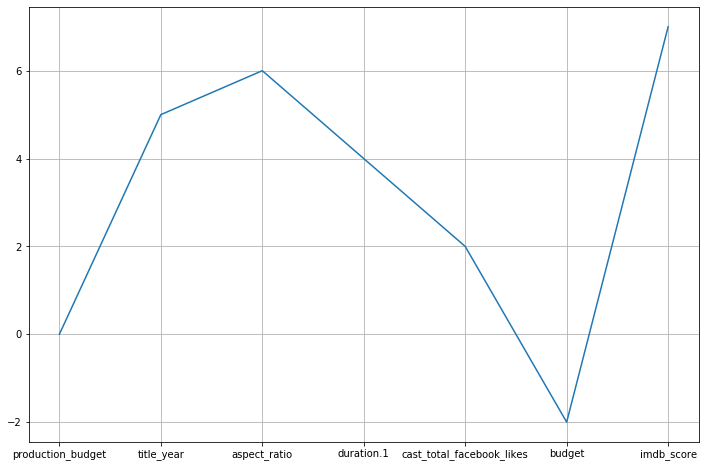

In [17]:
#Set style of plot output
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(coef) #To set this values in the plot
plt.grid(linestyle='-')

#Plot with labels & value of coeficients
plt.xticks(np.arange(7),list(X.columns));

### Correlation Between Variables

Visualising the feature to clasify them

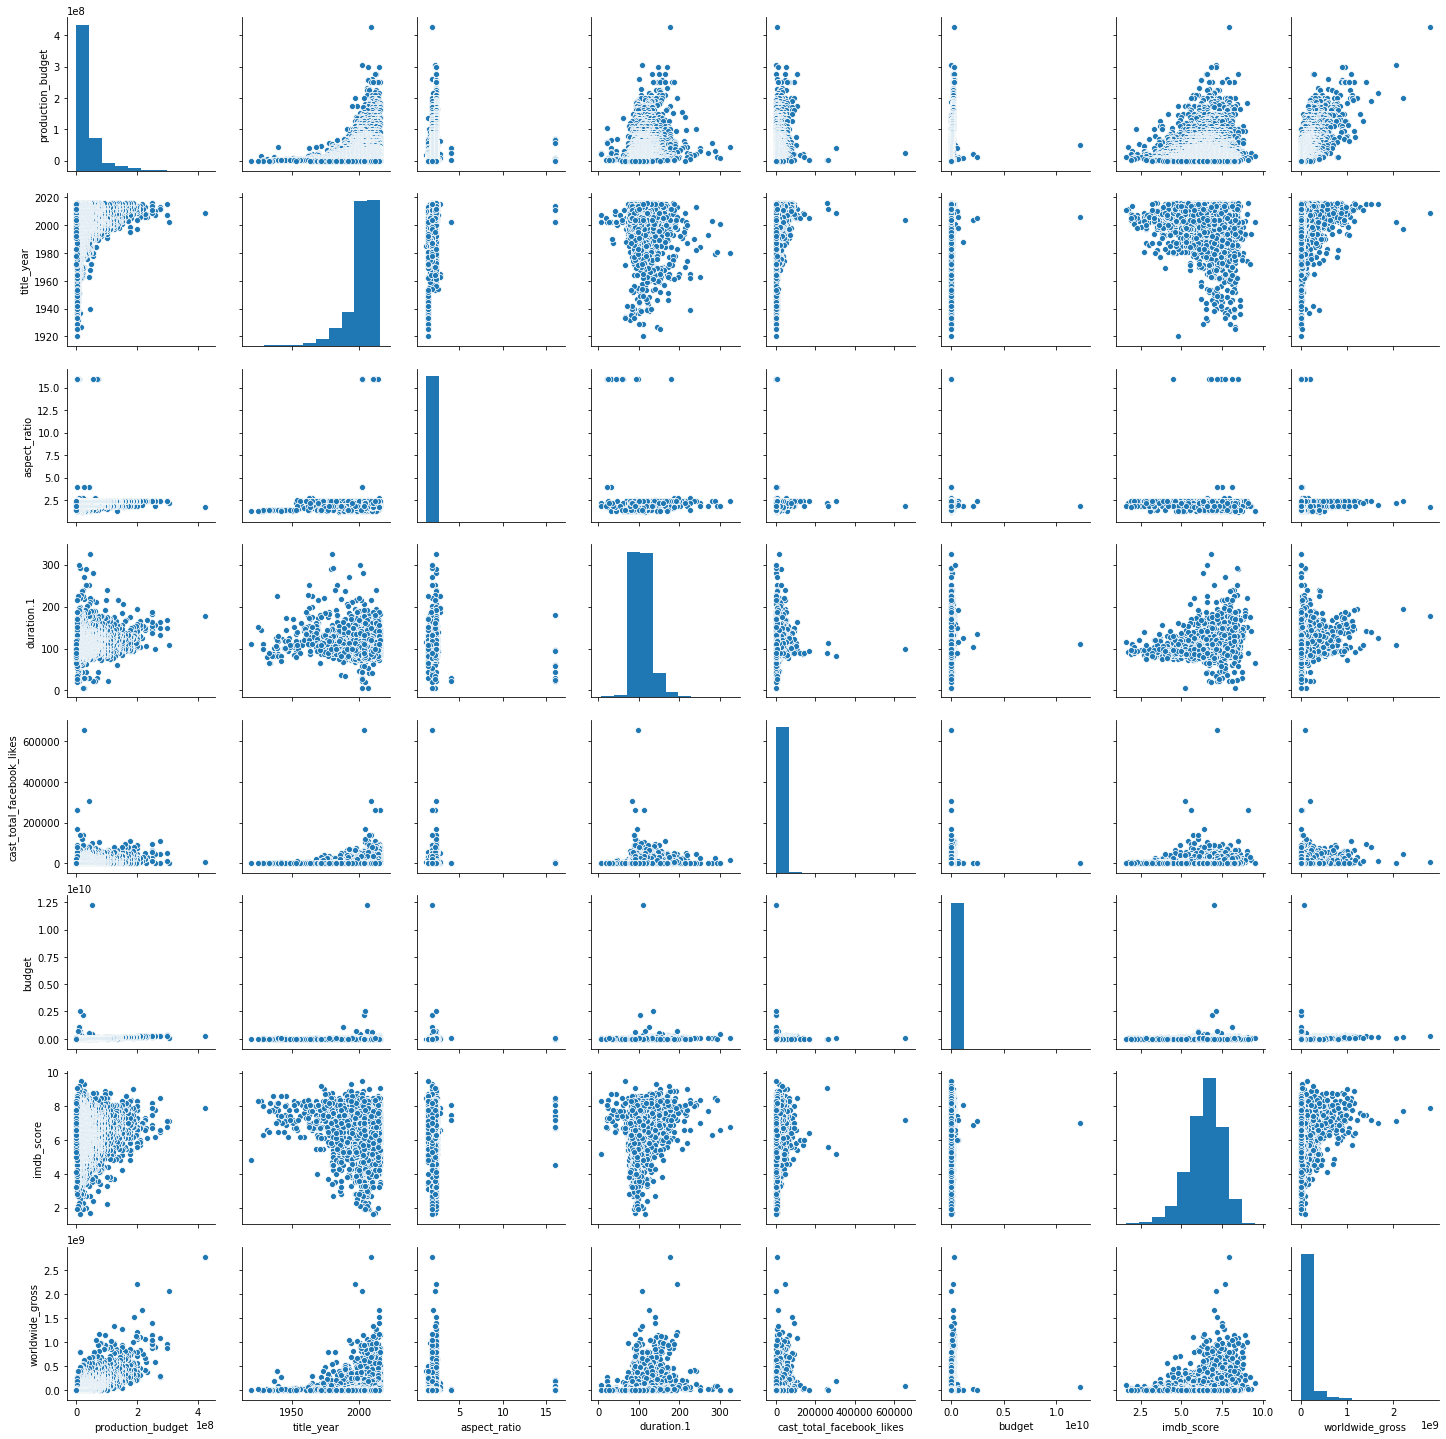

In [18]:
#information of Correlations
#To se the distribution of every feature (variable)

z = pd.concat([x,y], axis=1)
sns.pairplot(z)

In [19]:
z.shape , x.shape , y.shape

((4104, 8), (4104, 7), (4104,))

#### Create a numeric labelling for the correlations in one feature

In [20]:
#Sorting the variables (features)

label = pd.cut(x['production_budget'], 8) #create 8 categories
print(label)

#Castegorizing the labels (cuts)

label = label.cat.codes
print(label)

0       (371875137.5, 425000000.0]
1       (265625412.5, 318750275.0]
2       (265625412.5, 318750275.0]
3       (265625412.5, 318750275.0]
4       (265625412.5, 318750275.0]
                   ...            
4099       (-423898.9, 53125962.5]
4100       (-423898.9, 53125962.5]
4101       (-423898.9, 53125962.5]
4102       (-423898.9, 53125962.5]
4103       (-423898.9, 53125962.5]
Name: production_budget, Length: 4104, dtype: category
Categories (8, interval[float64]): [(-423898.9, 53125962.5] < (53125962.5, 106250825.0] < (106250825.0, 159375687.5] < (159375687.5, 212500550.0] < (212500550.0, 265625412.5] < (265625412.5, 318750275.0] < (318750275.0, 371875137.5] < (371875137.5, 425000000.0]]
0       7
1       5
2       5
3       5
4       5
       ..
4099    0
4100    0
4101    0
4102    0
4103    0
Length: 4104, dtype: int8


In [21]:
#Giving a name to the vector to add to the df

label = label.rename('class')

In [22]:
#Concatenate 

pd.concat([x,label], axis=1).head(10)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,class
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,5
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,5
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,5
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,5
5,275000000.0,2013.000000,2.350000,150.000000,45757.0,2.150000e+08,6.5,5
6,275000000.0,2012.000000,2.350000,132.000000,1873.0,2.637000e+08,6.6,5
7,260000000.0,2010.000000,1.850000,100.000000,2036.0,2.600000e+08,7.8,4
8,258000000.0,2007.000000,2.350000,156.000000,46055.0,2.580000e+08,6.2,4
9,258000000.0,2007.000000,2.350000,156.000000,46055.0,2.580000e+08,6.2,4


In [23]:
z2 = pd.concat([x,label], axis=1)

C:\Users\PC\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\PC\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


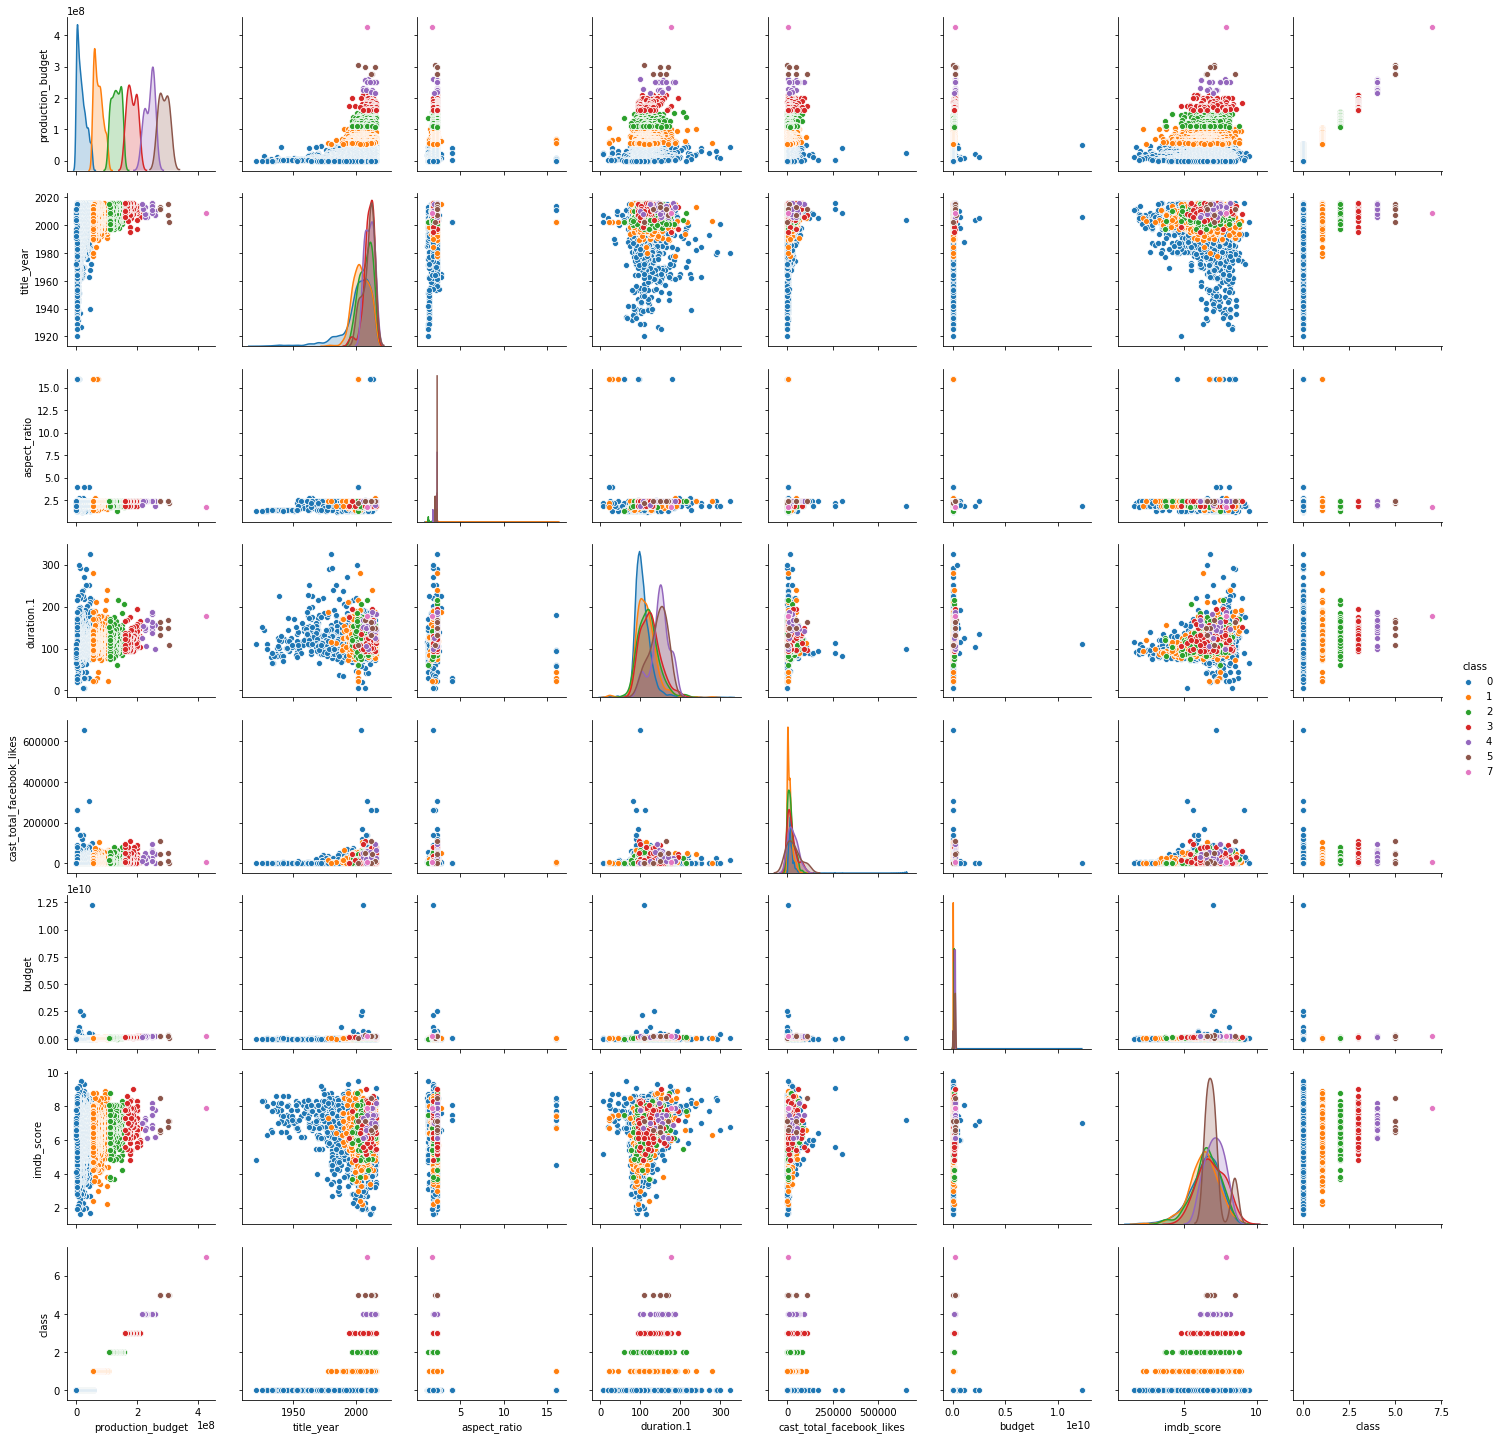

In [24]:
#Plotting

sns.pairplot(z2, hue='class')

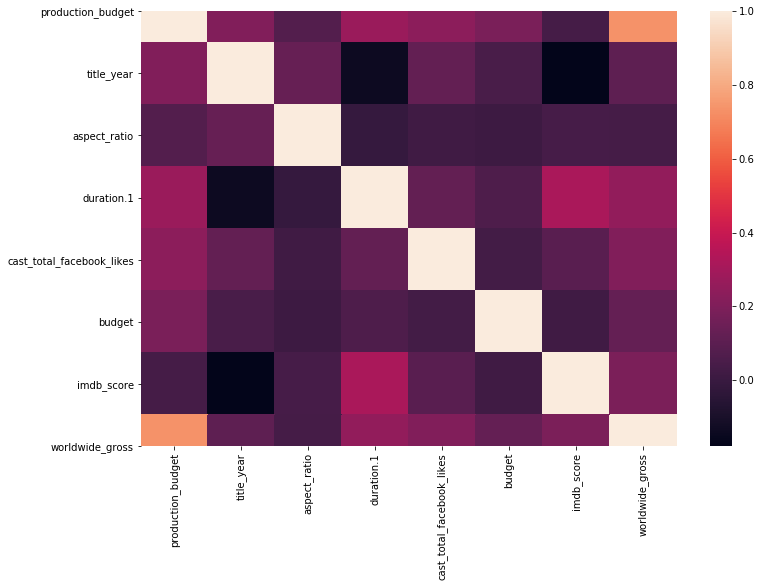

In [25]:
#Heat-map

z3 = pd.concat([x,y], axis = 1)

sns.heatmap(z3.corr())

### Methods to Select Better Features

In [26]:
from sklearn.feature_selection import SelectKBest #One way to pick best K features
from sklearn.feature_selection import mutual_info_regression #Metric to measure best features


num_features = 4
selector = SelectKBest(mutual_info_regression, k = num_features) 
selector.fit(x,y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x0000019D54FC6678>)

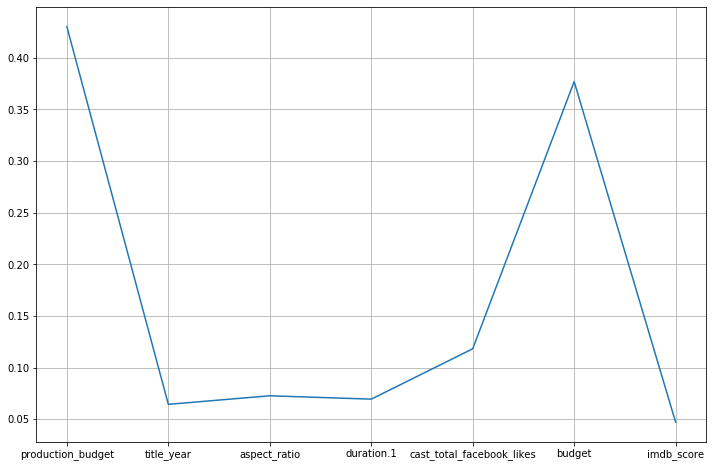

In [56]:
scores = selector.scores_

plt.rcParams["figure.figsize"] = [12,8] #output size 
plt.plot(scores)
plt.grid()
plt.xticks(np.arange(7),list(X.columns)); #labels in x

### Using Best Features to Train the Model

In [28]:
x2 = x[['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score']]
x3 = x[['production_budget','cast_total_facebook_likes','imdb_score']]

##### Training the Model

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [30]:
#Dividing the Train and Tests Sets for the new vectors x2 and x3

cols2 = ['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score']
x2_train, x2_test, y2_train, y2_test = x_train[cols2], x_test[cols2], y_train, y_test

cols3 = ['production_budget','cast_total_facebook_likes','imdb_score']
x3_train, x3_test, y3_train, y3_test = x_train[cols3], x_test[cols3], y_train, y_test

In [31]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

In [32]:
#Trainig Models

model1.fit(x_train,y_train)
model2.fit(x2_train,y2_train)
model3.fit(x3_train,y3_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
#Scores for each Model

print( model1.score(x_test, y_test) )
print( model2.score(x2_test, y2_test) )
print( model3.score(x3_test, y3_test) )

0.5952034418278408
0.5934692396045453
0.5944972320123836


# Data Scaling

In [34]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [35]:
path = '../vol/intermediate_result/x.csv'
x = pd.read_csv(path)
y = x['worldwide_gross']
to_drop = [ 'worldwide_gross' , 'gross']
x = x.drop(to_drop , axis = 1)

In [36]:
x.head(5)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5


In [57]:
y.head(5), y.shape

(0    2.783919e+09
 1    2.058662e+09
 2    9.634204e+08
 3    8.796209e+08
 4    1.084439e+09
 Name: worldwide_gross, dtype: float64, (4104,))

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

##### To Sacale: from sklearn use preporcessing and the object scaler

In [39]:
from sklearn.preprocessing import StandardScaler

#Object StandardScaler get the main and deviation for each column(feature)
#and use those values to scale each column individually

scaler = StandardScaler()
scaler.fit(x_train,y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

#####  The Scaler object stores the mean and the standard deviation for each feature

In [40]:
scaler.mean_

array([3.35445301e+07, 2.00213669e+03, 2.12169399e+00, 1.08454017e+02,
       1.02202586e+04, 4.23097437e+07, 6.46598441e+00])

In [41]:
#Standard Deviation  = scale_
scaler.scale_

array([4.09916005e+07, 1.19499830e+01, 7.20144956e-01, 2.32854391e+01,
       1.63177663e+04, 2.32325787e+08, 1.07340231e+00])

### Method for Transform a df 
Takes a df and transforms each entry in a scalabel value, i.e., all df values will have similar values, or be in the same scale(order of magnitude)

In [42]:
scaler.transform(x_train)

array([[ 0.40143516,  0.82538239, -0.37727681, ...,  0.70798547,
         0.03310117,  0.49749809],
       [-0.76953643,  0.57433601,  0.31702785, ..., -0.5287034 ,
        -0.00798171, -1.17941278],
       [-0.45239829,  0.40697176,  0.31702785, ..., -0.52367821,
        -0.00798171, -0.89992764],
       ...,
       [-0.30602684,  0.49065388,  0.31702785, ..., -0.2456377 ,
        -0.09172354, -0.34095735],
       [ 1.13329241, -0.01143888,  0.31702785, ..., -0.50872518,
         0.16223019, -0.52728078],
       [ 0.5965971 ,  1.1601109 ,  0.31702785, ...,  0.49141171,
         0.06753558,  1.52227695]])

In [43]:
x_train_scaled , x_test_scaled = ( scaler.transform(x_train), scaler.transform(x_test) )

##### Now, Train the model with the Scaled data 

In [44]:
from sklearn.linear_model import Lasso

model  = Lasso()
model_scaled = Lasso()

In [45]:
model.fit(x_train, y_train)
model_scaled.fit(x_train_scaled, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
# Print Scores for validation fo the model

print( model.score(x_test, y_test) )
print( model_scaled.score(x_test_scaled, y_test) )

0.5268111063519757
0.5268111078456802


### Simplified Transformation using Pipelines
Concatenate several tranformation for one model by usign one single instruction

In [47]:
from sklearn.pipeline import make_pipeline

model_scaled = make_pipeline(StandardScaler(),
                            Lasso())

model_scaled.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [48]:
print(model_scaled.score(x_test, y_test))

0.5268111078456802


### Creating new Features

In [49]:
A = np.arange(6).reshape(3,2)
A

array([[0, 1],
       [2, 3],
       [4, 5]])

In [50]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(2) #set degree of polynomial equals to 2
transformer.fit(A)
transformer.transform(A)  #Add columns to the original matrix A by multiplying it by the degree of the polynomi

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [51]:
#To do a fast code

transformer.fit_transform(A)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

##### Transforming the X data set

In [52]:
#Applying to the original data Set
x.shape

(4104, 7)

In [53]:
transformer = PolynomialFeatures(2)
transformer.fit_transform(x).shape

(4104, 36)

In [54]:
#Train the model 

model_poly = make_pipeline(PolynomialFeatures(2),
                          Lasso())
model_poly.fit(x_train,y_train)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.554321421538523e+19, tolerance: 8960891096669578.0
  positive)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [55]:
print(model_poly.score(x_test, y_test))

0.603680804459761


## Features Categoricas

Deals with names or characteristics in the features columns which are not numbers.  

In [58]:
path = '../vol/intermediate_result/movies_obj.csv'
movies_obj = pd.read_csv(path)

In [61]:
movies_obj.shape

(5043, 11)

In [63]:
#number of categories 

movies_obj.apply( pd.Series.nunique)

movie_title       4917
color                2
language            47
country             65
genres             914
content_rating      18
plot_keywords     4760
director_name     2398
actor_1_name      2097
actor_2_name      3032
actor_3_name      3521
dtype: int64

In [64]:
#To see all the information inside the df 

movies_obj.apply( pd.Series.nunique).sort_values()

color                2
content_rating      18
language            47
country             65
genres             914
actor_1_name      2097
director_name     2398
actor_2_name      3032
actor_3_name      3521
plot_keywords     4760
movie_title       4917
dtype: int64

### Binary Encoding

Category $\rightarrow$ Number $\rightarrow$ Binary representation $\rightarrow$ B.number in Columns

In [65]:
!pip install category_encoders

In [68]:
path = '../vol/intermediate_result/categoricals.csv'
categoricals = pd.read_csv(path).set_index('Unnamed: 0')

In [70]:
categoricals.head()

,actor_1_name,director_name
Unnamed: 0,,
0,CCH Pounder,James Cameron
1,Doug Walker,Doug Walker
2,Johnny Depp,Gore Verbinski
3,Christoph Waltz,Sam Mendes
4,Tom Hardy,Christopher Nolan


In [72]:
#Because Unnamed: 0 is a Index, we drop it before continuing

categoricals.reset_index(drop=True)

,actor_1_name,director_name
0,CCH Pounder,James Cameron
1,Doug Walker,Doug Walker
2,Johnny Depp,Gore Verbinski
3,Christoph Waltz,Sam Mendes
4,Tom Hardy,Christopher Nolan
...,...,...
4099,Shane Carruth,Shane Carruth
4100,Ian Gamazon,Neill Dela Llana
4101,Richard Jewell,Anthony Vallone
4102,Alan Ruck,Daniel Hsia


In [74]:
#For all the NaN values we replace them with 0's

categoricals = categoricals.reset_index(drop=True).fillna(0)

### Working with all the DataFrame 

In [113]:
x.head(4), x.shape

(   production_budget   title_year  aspect_ratio  duration.1  \
 0        425000000.0  2009.000000      1.780000  178.000000   
 1        306000000.0  2002.130733      2.126976  108.577186   
 2        300000000.0  2007.000000      2.350000  169.000000   
 3        300000000.0  2015.000000      2.350000  148.000000   
 
    cast_total_facebook_likes        budget  imdb_score  
 0                     4834.0  2.370000e+08         7.9  
 1                      143.0  4.045539e+07         7.1  
 2                    48350.0  3.000000e+08         7.1  
 3                    11700.0  2.450000e+08         6.8  , (4104, 7))

In [76]:
x_binenc = pd.concat([x, categoricals], axis = 1)

In [77]:
x_binenc.head(5)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,actor_1_name,director_name
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,CCH Pounder,James Cameron
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,Doug Walker,Doug Walker
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,Johnny Depp,Gore Verbinski
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,Christoph Waltz,Sam Mendes
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,Tom Hardy,Christopher Nolan


###### Importing the Binary Encoder

In [114]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols = ['actor_1_name', 'director_name'])

In [104]:
encoder.fit_transform(x_binenc).shape

(4104, 31)

In [115]:
x_binec = encoder.fit_transform(x_binenc)
x_binec

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,actor_1_name_0,actor_1_name_1,actor_1_name_2,...,director_name_2,director_name_3,director_name_4,director_name_5,director_name_6,director_name_7,director_name_8,director_name_9,director_name_10,director_name_11
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,7000.0,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0,0,1,1,...,1,1,1,0,1,0,1,1,0,1
4100,7000.0,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3,0,1,1,...,1,1,1,0,1,0,1,1,1,0
4101,7000.0,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8,0,1,1,...,1,1,1,0,1,0,1,1,1,1
4102,3967.0,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3,0,0,1,...,1,1,1,0,1,1,0,0,0,0


##### To test the new df with the training

In [116]:
from sklearn.model_selection import train_test_split

xb_train, xb_test, y_train, y_test = train_test_split(x_binenc,y)

In [117]:
#To compare df without new features we extract the 'past' features

x_train , x_test = (xb_train[x.columns], xb_test[x.columns])

In [118]:
model_binenc = Lasso()
model = Lasso()

In [119]:
model_binenc.fit(xb_train, y_train)
model.fit(x_train,y_train)

ValueError: could not convert string to float: 'David Arquette'